In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [3]:
data = pd.read_csv("C:\\Users\\14694\\Documents\\Multiclass project\\healthcare\\train_data.csv")

In [4]:
data.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [13]:
data.shape

(318438, 18)

Text(0.5, 1.0, 'Distribution of count for STAY')

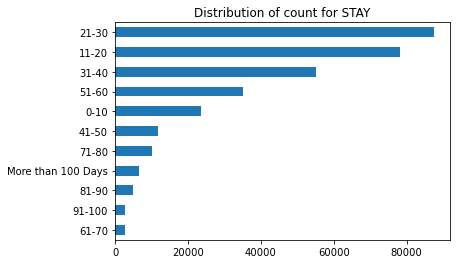

In [11]:
data['Stay'].value_counts(ascending=True).plot(kind='barh')
plt.title('Distribution of count for STAY')

Maximum distribution of stay is 21-30 days followed by 11-20 days and 31-40days

<AxesSubplot:xlabel='Age', ylabel='count'>

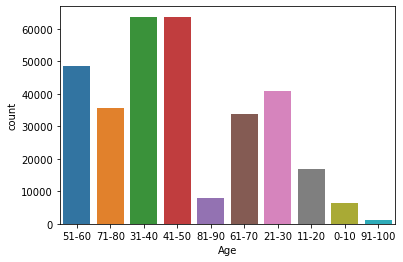

In [25]:
sns.countplot(data = data[cat] , x = 'Age')


In [17]:
stay_age_distribution = pd.get_dummies(data.loc[:,['Stay','Age']], columns=['Age']).groupby('Stay', as_index=False).sum()
stay_age_distribution

,Stay,Age_0-10,Age_11-20,Age_21-30,Age_31-40,Age_41-50,Age_51-60,Age_61-70,Age_71-80,Age_81-90,Age_91-100
0,0-10,615.0,1552.0,3467.0,4916.0,4727.0,3427.0,2194.0,2201.0,422.0,83.0
1,11-20,1959.0,5343.0,11272.0,15792.0,14959.0,11346.0,7870.0,7958.0,1392.0,248.0
2,21-30,1489.0,4312.0,11394.0,18550.0,17906.0,13058.0,9033.0,9534.0,1920.0,295.0
3,31-40,1014.0,2681.0,6912.0,10912.0,10983.0,8569.0,5930.0,6420.0,1504.0,234.0
4,41-50,187.0,510.0,1398.0,2373.0,2507.0,1735.0,1205.0,1383.0,379.0,66.0
5,51-60,582.0,1429.0,3793.0,6517.0,7189.0,5739.0,4081.0,4433.0,1082.0,173.0
6,61-70,26.0,89.0,263.0,509.0,562.0,448.0,325.0,378.0,115.0,29.0
7,71-80,153.0,350.0,1026.0,1807.0,2146.0,1710.0,1230.0,1367.0,402.0,63.0
8,81-90,84.0,223.0,546.0,801.0,885.0,784.0,600.0,670.0,216.0,29.0
9,91-100,35.0,71.0,231.0,484.0,578.0,499.0,330.0,386.0,132.0,19.0


In [18]:
now = stay_age_distribution.columns.tolist()
now.remove('Stay')
print(now)

['Age_0-10', 'Age_11-20', 'Age_21-30', 'Age_31-40', 'Age_41-50', 'Age_51-60', 'Age_61-70', 'Age_71-80', 'Age_81-90', 'Age_91-100']


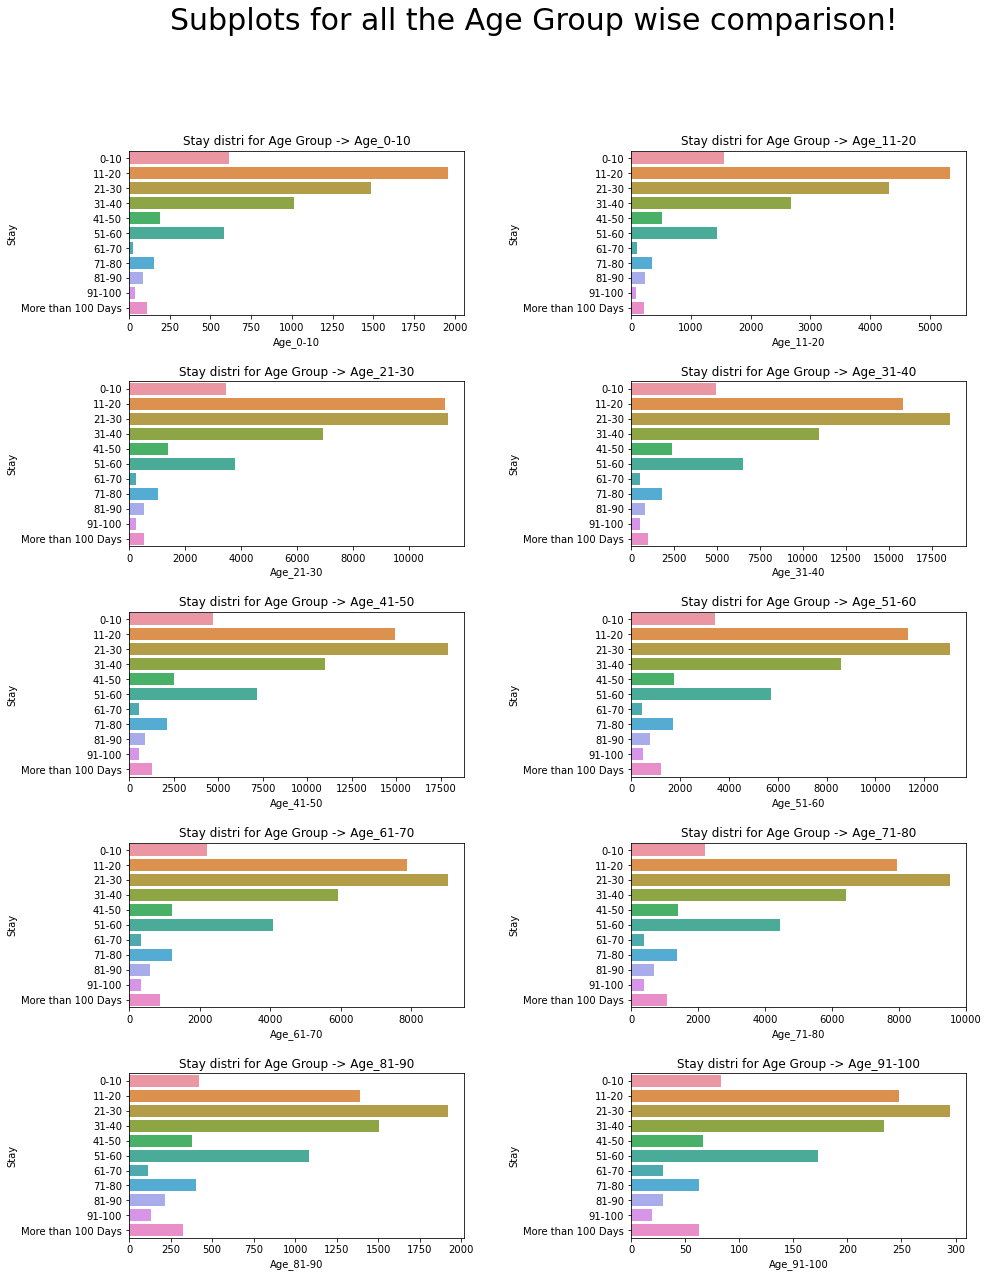

In [20]:
plt.figure(figsize=(15,20))
plt.suptitle("Subplots for all the Age Group wise comparison!", fontsize=30)
x = 1
for age in now:
    ax = plt.subplot(int(len(now)//2),2,x)
    ax = plt.subplots_adjust(wspace=0.5,hspace=0.4)
    sns.barplot(y = 'Stay',x = age,data = stay_age_distribution,ax = ax)
    plt.title(f'Stay distri for Age Group -> {age}')
    x +=1

In [21]:
cat =  ['Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available Extra Rooms in Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade',
        'City_Code_Patient', 'Type of Admission',
       'Severity of Illness', 'Visitors with Patient', 'Age',
       'Admission_Deposit', 'Stay']

<AxesSubplot:xlabel='Hospital_type_code', ylabel='count'>

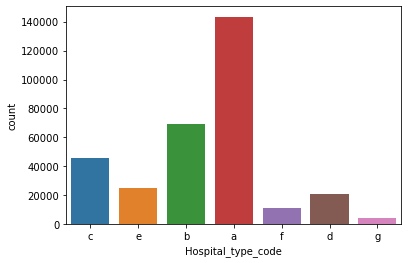

In [22]:
sns.countplot(data = data[cat] , x = 'Hospital_type_code')

<AxesSubplot:xlabel='Hospital_region_code', ylabel='count'>

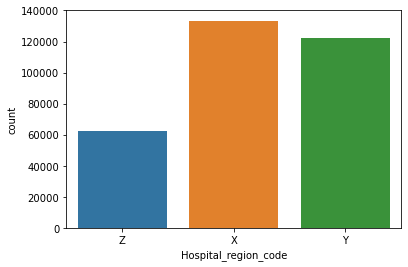

In [24]:
sns.countplot(data = data[cat] , x = 'Hospital_region_code')


<AxesSubplot:xlabel='Department', ylabel='count'>

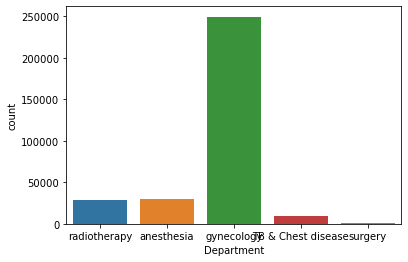

In [27]:
sns.countplot(data = data[cat] , x = 'Department')

In [31]:
stay_dept_distribution = pd.get_dummies(data.loc[:,['Stay','Department']], columns=['Department']).groupby('Stay', as_index=False).sum()
stay_dept_distribution

,Stay,Department_TB & Chest disease,Department_anesthesia,Department_gynecology,Department_radiotherapy,Department_surgery
0,0-10,791.0,1519.0,18849.0,2379.0,66.0
1,11-20,2379.0,8823.0,59690.0,6988.0,259.0
2,21-30,2618.0,8950.0,68383.0,7263.0,277.0
3,31-40,1753.0,4958.0,43535.0,4713.0,200.0
4,41-50,300.0,851.0,9671.0,879.0,42.0
5,51-60,1047.0,2527.0,27989.0,3256.0,199.0
6,61-70,76.0,173.0,2226.0,264.0,5.0
7,71-80,294.0,703.0,8165.0,1043.0,49.0
8,81-90,140.0,384.0,3748.0,528.0,38.0
9,91-100,64.0,156.0,2269.0,256.0,20.0


In [32]:
now = stay_dept_distribution.columns.tolist()
now.remove('Stay')
print(now)

['Department_TB & Chest disease', 'Department_anesthesia', 'Department_gynecology', 'Department_radiotherapy', 'Department_surgery']


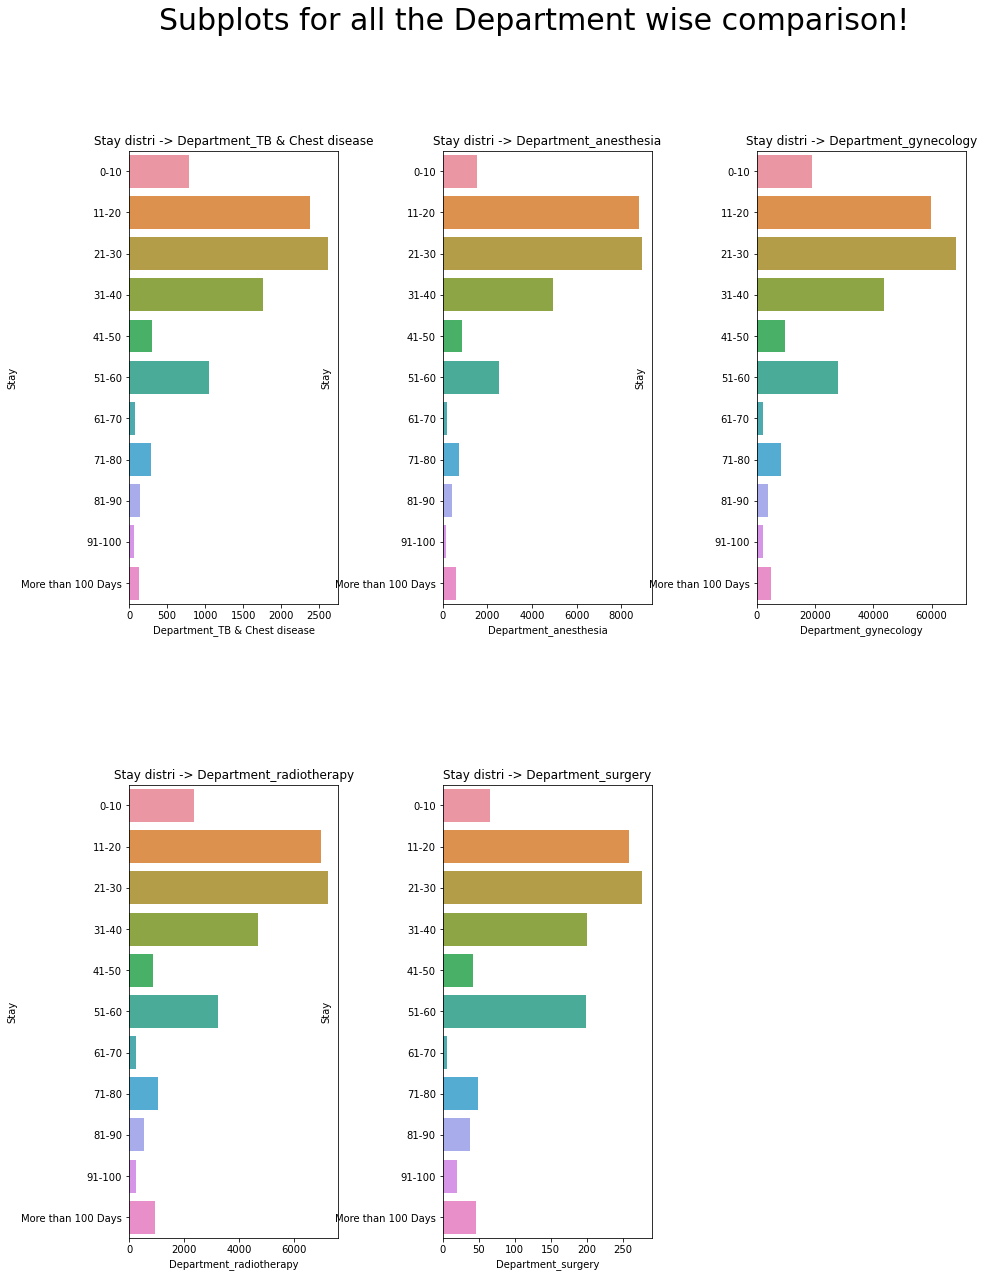

In [41]:
plt.figure(figsize=(15,20))
plt.suptitle("Subplots for all the Department wise comparison!", fontsize=30)
x = 1
for dept in now:
    ax = plt.subplot(int(len(now)//2),3,x)
    ax = plt.subplots_adjust(wspace=0.5,hspace=0.4)
    sns.barplot(y = 'Stay',x = dept,data = stay_dept_distribution,ax = ax)
    plt.title(f'Stay distri -> {dept}')
    x +=1

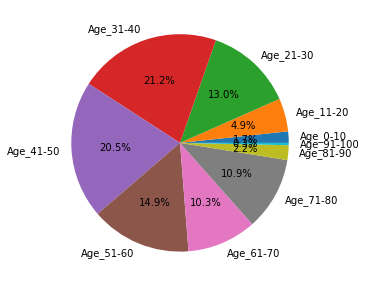

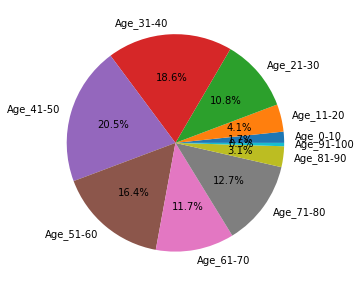

In [42]:
stay_durations = ['21-30','51-60']
stay_specific_data = stay_age_distribution[stay_age_distribution.Stay.isin(stay_durations)].reset_index(drop=True).iloc[:,1:]
for ind in stay_specific_data.index:
    fig, ax = plt.subplots(1,1)
    fig.set_size_inches(5,5)
    # print(stay_specific_data.iloc[ind])
    stay_specific_data.iloc[ind].plot(kind='pie', ax=ax, autopct='%1.1f%%')
    ax.set_ylabel('')
    ax.set_xlabel('')

Age 31-40 and 41-50 dominate the 1month and 2month duration stay

<AxesSubplot:xlabel='Type of Admission', ylabel='count'>

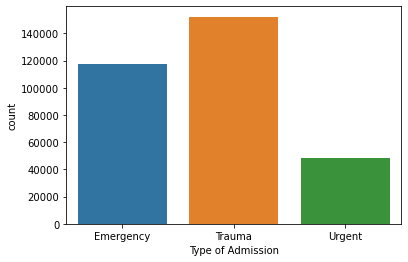

In [46]:
sns.countplot(data = data[cat] , x = 'Type of Admission')

In [49]:
dep_stay_age_distri = data.groupby(by = ['Stay','Age','Department'])['Department'].count().reset_index(level = 1)
dep_stay_age_distri

Age  Department
Stay               Department                            
0-10               TB & Chest disease    0-10          35
                   anesthesia            0-10          41
                   gynecology            0-10         449
                   radiotherapy          0-10          80
                   surgery               0-10          10
...                                       ...         ...
More than 100 Days radiotherapy         81-90          55
                   TB & Chest disease  91-100           1
                   anesthesia          91-100           3
                   gynecology          91-100          48
                   radiotherapy        91-100          11

[529 rows x 2 columns]

In [50]:
dur_21_30 = dep_stay_age_distri[dep_stay_age_distri.index.get_level_values('Stay').isin([stay_durations[0]])].rename(columns = {'Department':'Count of patients'}).reset_index(level=1)
dur_51_60 = dep_stay_age_distri[dep_stay_age_distri.index.get_level_values('Stay').isin([stay_durations[1]])].rename(columns = {'Department':'Count of patients'}).reset_index(level=1)

In [51]:
total_21_30 = dur_21_30.groupby('Department')['Count of patients'].sum()
total_51_60 = dur_51_60.groupby('Department')['Count of patients'].sum()
total_21_30

Department
TB & Chest disease     2618
anesthesia             8950
gynecology            68383
radiotherapy           7263
surgery                 277
Name: Count of patients, dtype: int64

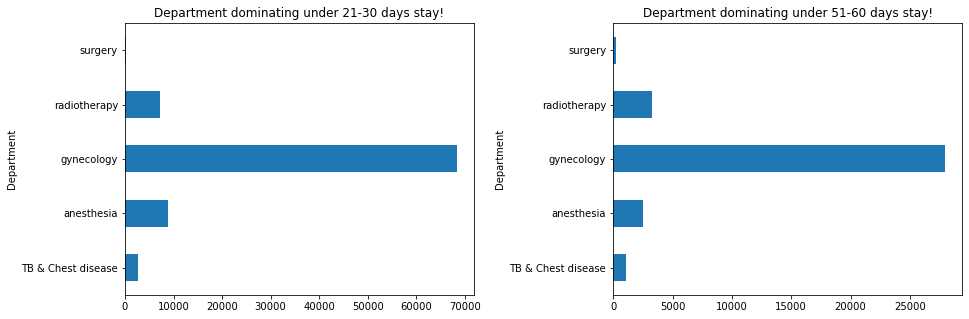

In [52]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.subplots_adjust(wspace=0.4,hspace=0.3)
total_21_30.plot(kind = 'barh');
plt.title('Department dominating under 21-30 days stay!');
plt.subplot(1,2,2)
total_51_60.plot(kind = 'barh');
plt.title('Department dominating under 51-60 days stay!');

Gynecology is the dominating patient stay department

<AxesSubplot:>

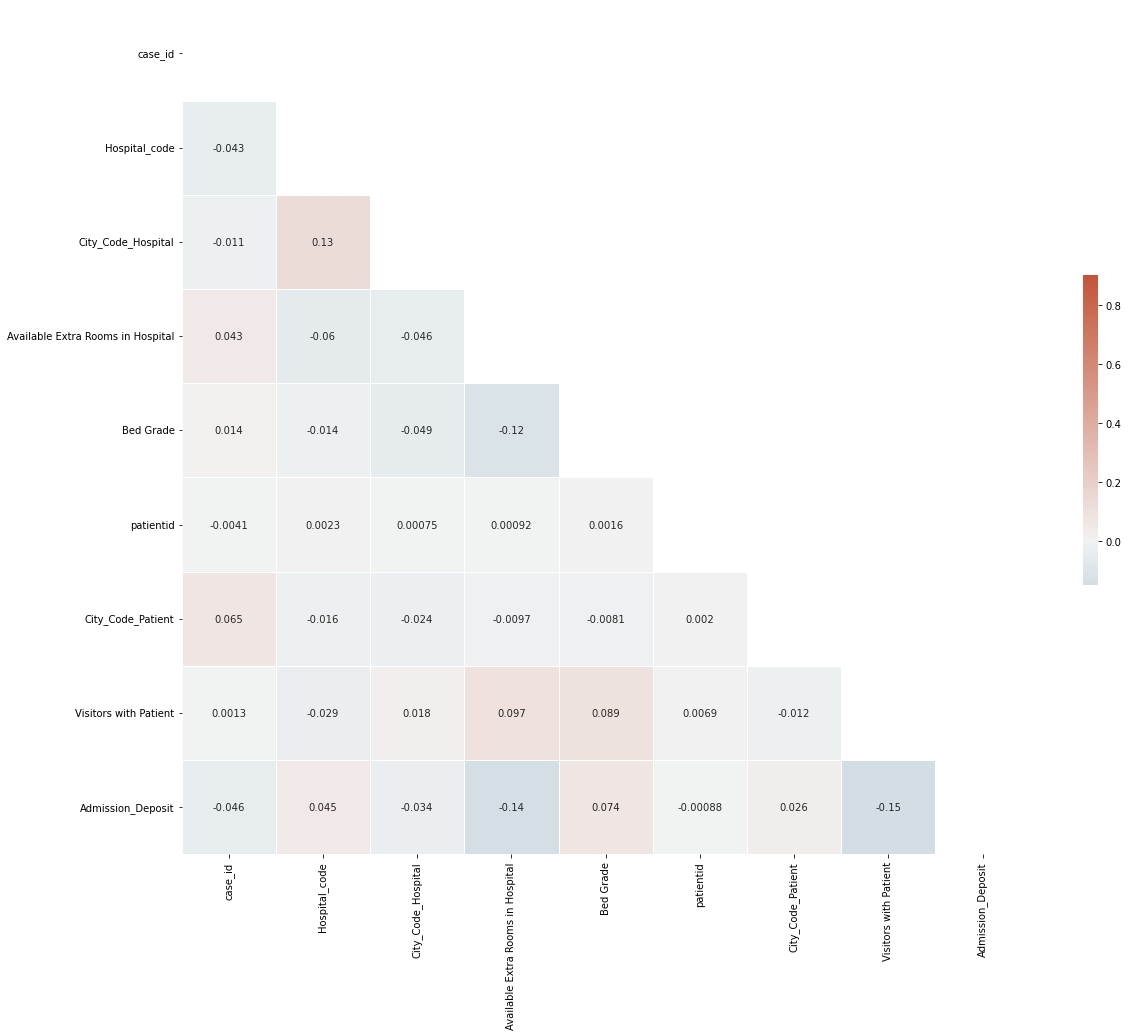

In [44]:
#correlation matrix
corr = data.corr()
# heatmap
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(19, 19))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, center=0,
            square=True, linewidths=.7, cbar_kws={"shrink": .3},annot=True)